In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Style settings
sns.set(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (8, 5)

In [28]:
# Load Cleaned Dataset
df = pd.read_csv("../data/EV_Battery_Performance_Clean.csv")
df.index=range(1,len(df)+1)
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
1,Abarth,500e Convertible,155.0,37.8,Lithium-ion,192.00,235.0,156,225,7.0,67.0,1348.84,185.0,FWD,B - Compact,3673.0,1714,1518.0,Hatchback
2,Abarth,500e Hatchback,155.0,37.8,Lithium-ion,192.00,235.0,149,225,7.0,67.0,1348.84,185.0,FWD,B - Compact,3673.0,1714,1518.0,Hatchback
3,Abarth,600e Scorpionissima,200.0,50.8,Lithium-ion,102.00,345.0,158,280,5.9,79.0,1348.84,360.0,FWD,JB - Compact,4187.0,1779,1557.0,SUV
4,Abarth,600e Turismo,200.0,50.8,Lithium-ion,102.00,345.0,158,280,6.2,79.0,1348.84,360.0,FWD,JB - Compact,4187.0,1779,1557.0,SUV
5,Aiways,U5,150.0,60.0,Lithium-ion,487.77,310.0,156,315,7.5,78.0,1050.05,496.0,FWD,JC - Medium,4680.0,1865,1700.0,SUV


In [29]:
# A. Performance Analysis

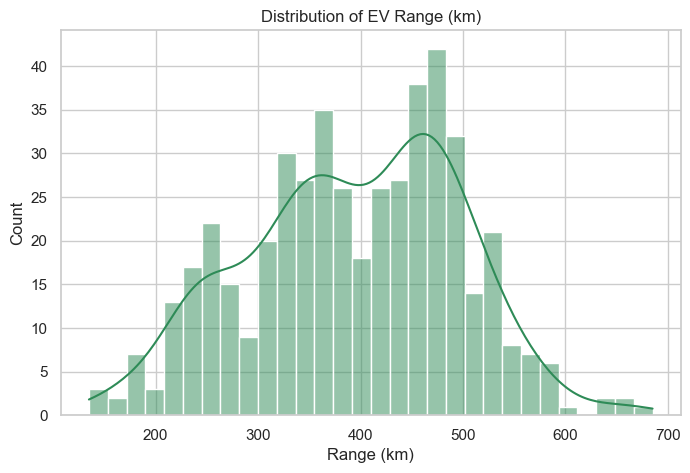

<Figure size 800x500 with 0 Axes>

In [30]:
# Range Distribution

plt.figure()
sns.histplot(
    df['range_km'], 
    kde=True, 
    bins=30, 
    color='seagreen'
)
plt.title('Distribution of EV Range (km)')
plt.xlabel('Range (km)')
plt.ylabel('Count')
plt.show()
plt.savefig('../visuals/distribution_of_ev_vs_range.png', dpi=300, bbox_inches='tight')

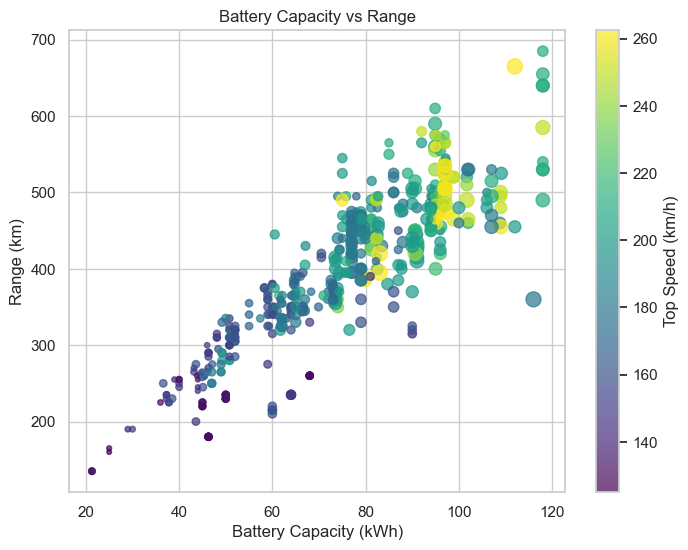

<Figure size 800x500 with 0 Axes>

In [31]:
# Battery Capacity vs Range

plt.figure(figsize=(8,6))
plt.scatter(
    df['battery_capacity_kWh'], 
    df['range_km'], 
    s=df['torque_nm']/10,
    c=df['top_speed_kmh'], 
    cmap='viridis', 
    alpha=0.7
)
plt.colorbar(label='Top Speed (km/h)')
plt.title("Battery Capacity vs Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.show()
plt.savefig('../visuals/battery_capacity_vs_range.png', dpi=300, bbox_inches='tight')


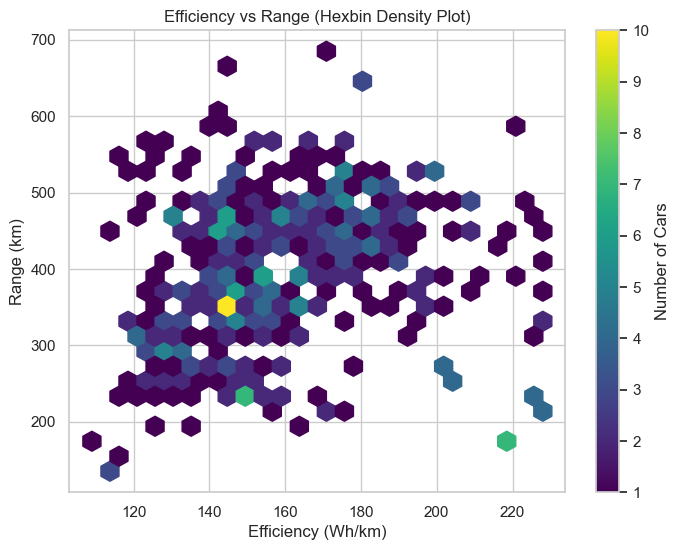

<Figure size 800x500 with 0 Axes>

In [32]:
# Efficiency vs Range 

plt.figure(figsize=(8,6))
plt.hexbin(
    df['efficiency_wh_per_km'], 
    df['range_km'],
    gridsize=25,          
    cmap='viridis',       
    mincnt=1              
)
plt.colorbar(label='Number of Cars')
plt.title('Efficiency vs Range (Hexbin Density Plot)')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Range (km)')
plt.show()
plt.savefig('../visuals/efficiency_vs_range.png', dpi=300, bbox_inches='tight')


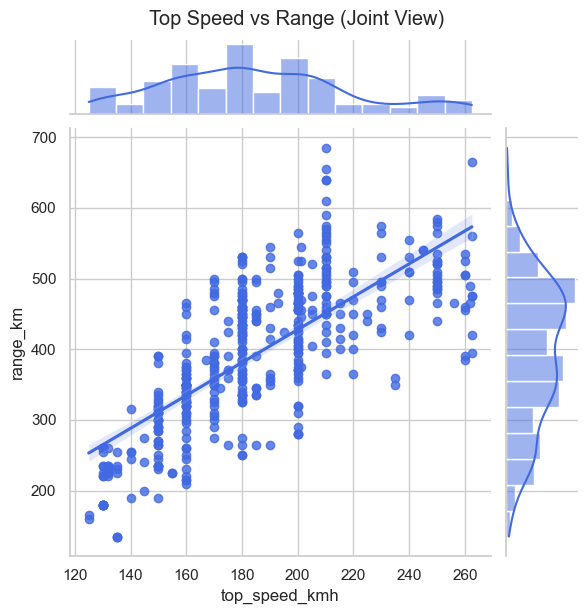

<Figure size 800x500 with 0 Axes>

In [33]:
# Top Speed vs Range

sns.jointplot(
    x='top_speed_kmh', 
    y='range_km', 
    data=df, 
    kind='reg', 
    color='royalblue'
)
plt.suptitle('Top Speed vs Range (Joint View)', y=1.02)
plt.show()
plt.savefig('../visuals/top_speed_vs_range.png', dpi=300, bbox_inches='tight')


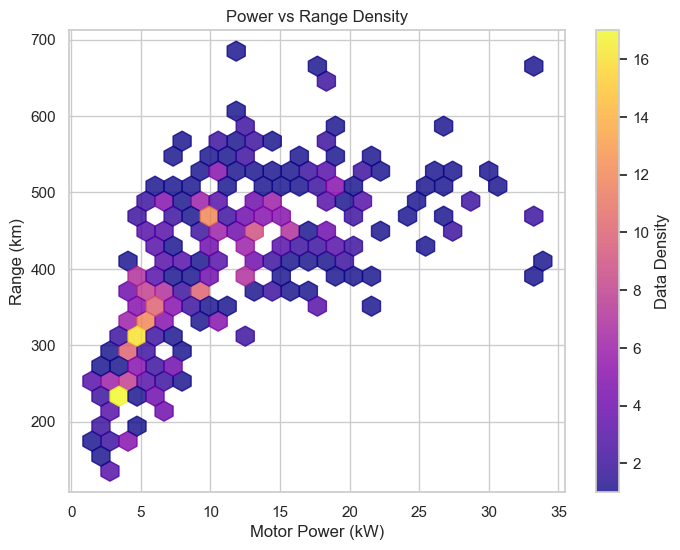

<Figure size 800x500 with 0 Axes>

In [34]:
# Motor Power vs Battery Range

df['motor_power_kw'] = (df['torque_nm'] * df['top_speed_kmh']) / 9549

plt.figure(figsize=(8,6))
plt.hexbin(
    df['motor_power_kw'],
    df['range_km'], 
    gridsize=25, 
    cmap='plasma', 
    alpha=0.8, 
    mincnt=1
)
plt.colorbar(label='Data Density')
plt.title('Power vs Range Density')
plt.xlabel('Motor Power (kW)')
plt.ylabel('Range (km)')
plt.show()
plt.savefig('../visuals/power_vs_range_density.png', dpi=300, bbox_inches='tight')

In [35]:
# B. Battery Life & Efficiency Analysis

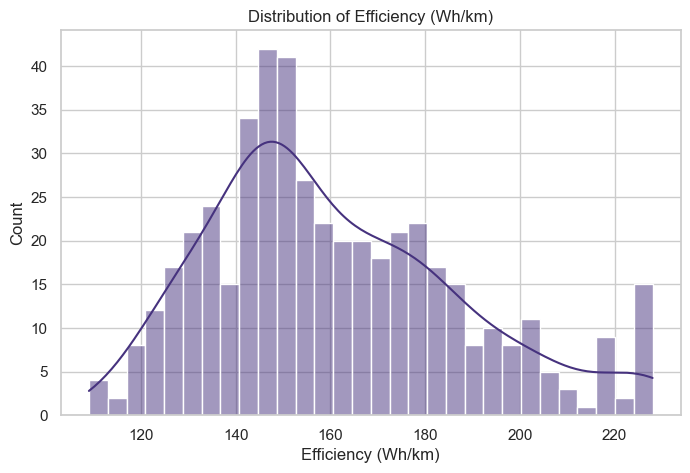

<Figure size 800x500 with 0 Axes>

In [36]:
# Distribution of Efficiency

plt.figure()
sns.histplot(
    df['efficiency_wh_per_km'], 
    kde=True, 
    bins=30
)
plt.title('Distribution of Efficiency (Wh/km)')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Count')
plt.show()
plt.savefig('../visuals/distribution_of_efficiency.png', dpi=300, bbox_inches='tight')

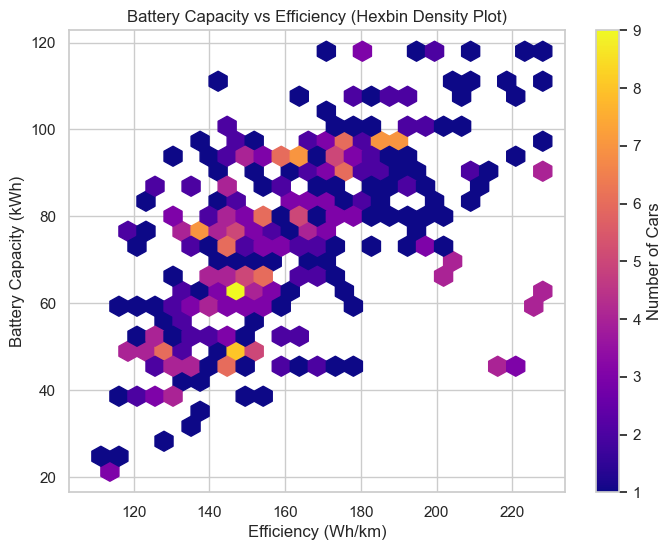

<Figure size 800x500 with 0 Axes>

In [37]:
# Battery Capacity vs Efficiency 

plt.figure(figsize=(8,6))
plt.hexbin(
    df['efficiency_wh_per_km'], 
    df['battery_capacity_kWh'], 
    gridsize=25,        
    cmap='plasma',        
    mincnt=1              
)
plt.colorbar(label='Number of Cars')
plt.title('Battery Capacity vs Efficiency (Hexbin Density Plot)')
plt.ylabel('Battery Capacity (kWh)')
plt.xlabel('Efficiency (Wh/km)')
plt.show()
plt.savefig('../visuals/battery_capacity_vs_efficiency.png', dpi=300, bbox_inches='tight')


In [38]:
# C. Technical Feature Impact

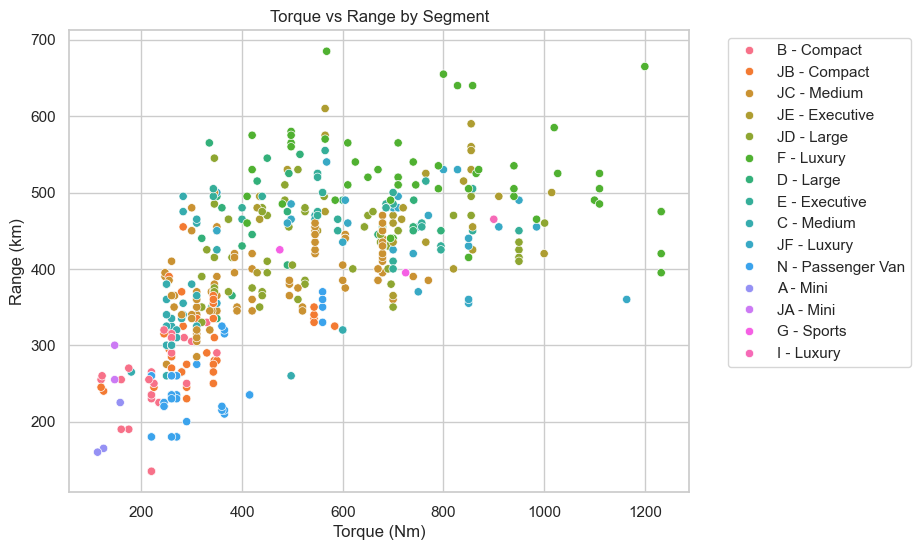

<Figure size 800x500 with 0 Axes>

In [39]:
# Torque vs Range

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='torque_nm', 
    y='range_km', 
    hue='segment', 
    data=df
)
plt.title("Torque vs Range by Segment")
plt.xlabel("Torque (Nm)")
plt.ylabel("Range (km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.savefig('../visuals/torque_vs_range.png', dpi=300, bbox_inches='tight')


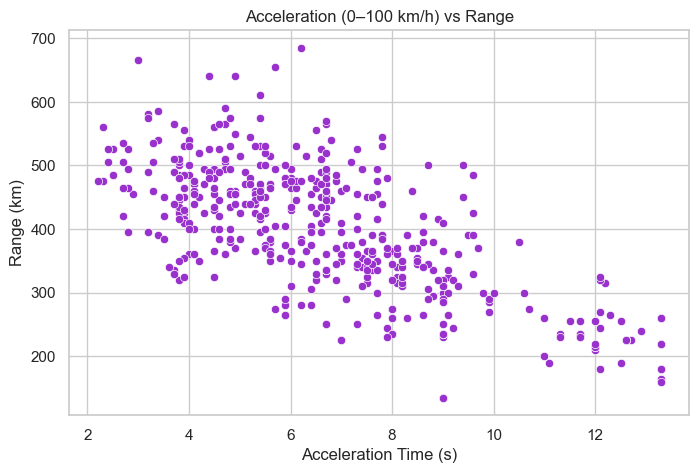

<Figure size 800x500 with 0 Axes>

In [40]:
# Acceleration vs Range

plt.figure()
sns.scatterplot(
    x='acceleration_0_100_s', 
    y='range_km', 
    data=df, 
    color='darkorchid'
)
plt.title('Acceleration (0–100 km/h) vs Range')
plt.xlabel('Acceleration Time (s)')
plt.ylabel('Range (km)')
plt.show()
plt.savefig('../visuals/acceleration_vs_range.png', dpi=300, bbox_inches='tight')

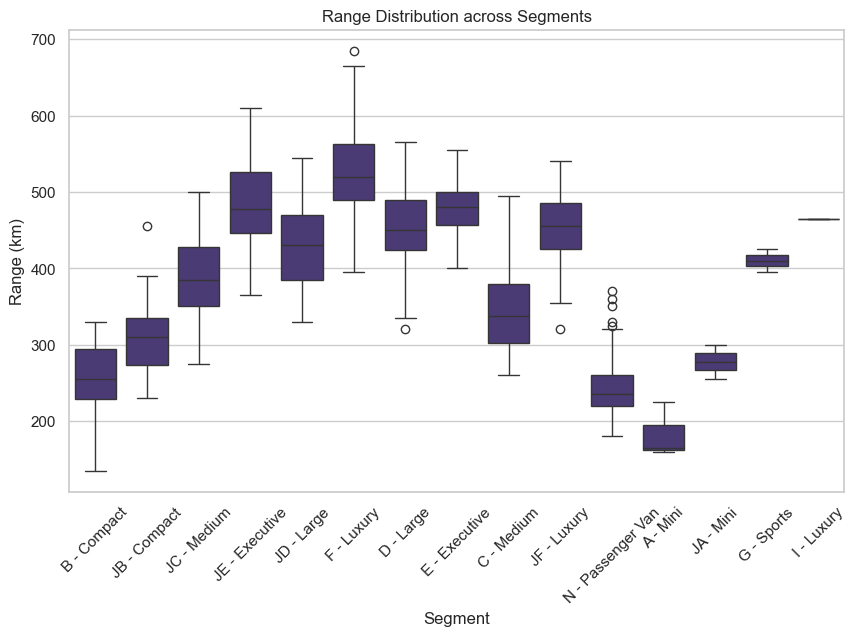

<Figure size 800x500 with 0 Axes>

In [41]:
# Range Distribution across Segments

plt.figure(figsize=(10,6))
sns.boxplot(
    x='segment', 
    y='range_km', 
    data=df
)
plt.title("Range Distribution across Segments")
plt.xlabel("Segment")
plt.ylabel("Range (km)")
plt.xticks(rotation=45)
plt.show()
plt.savefig('../visuals/range_distribution_across_segments.png', dpi=300, bbox_inches='tight')


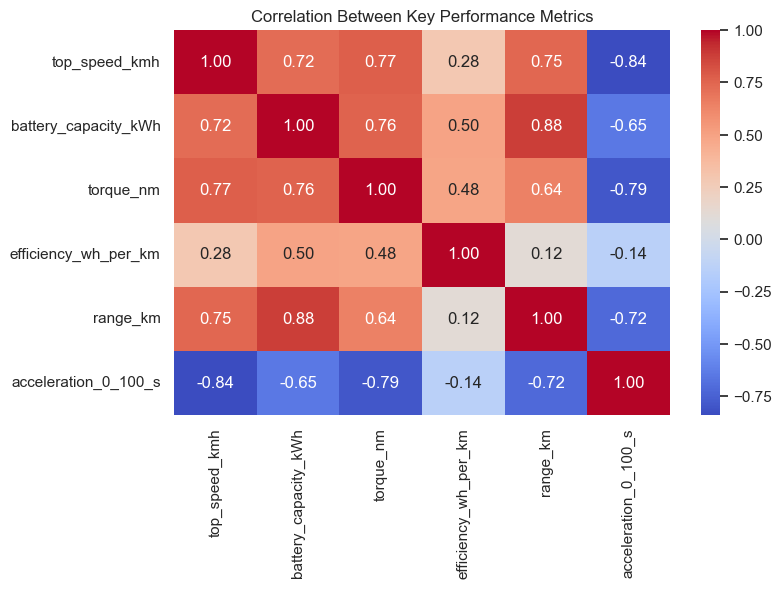

<Figure size 800x500 with 0 Axes>

In [42]:
# Correlation Heatmap

numeric_cols = ['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm', 
                'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Key Performance Metrics')
plt.show()
plt.savefig('../visuals/correlation_between_key_performance_metrics.png', dpi=300, bbox_inches='tight')

In [43]:
# D. Brand & Category Insights

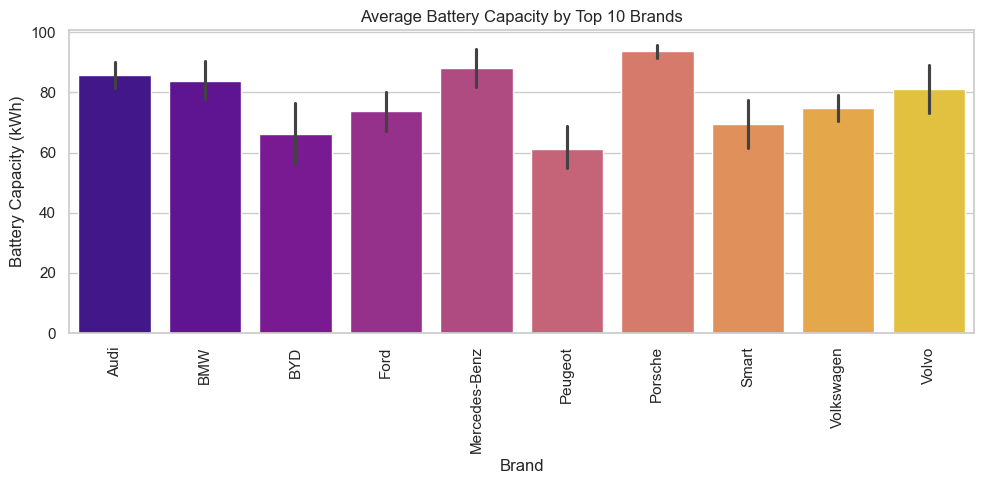

<Figure size 800x500 with 0 Axes>

In [44]:
# Average Range per Brand

top_brands = df['brand'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.barplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    y='battery_capacity_kWh',
    estimator=np.mean,
    hue='brand',
    dodge=False,
    palette='plasma',
    legend=False
)
plt.xticks(rotation=90)
plt.title('Average Battery Capacity by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Battery Capacity (kWh)')
plt.tight_layout()
plt.show()
plt.savefig('../visuals/average_battery_capacity_by_top_10_brands.png', dpi=300, bbox_inches='tight')


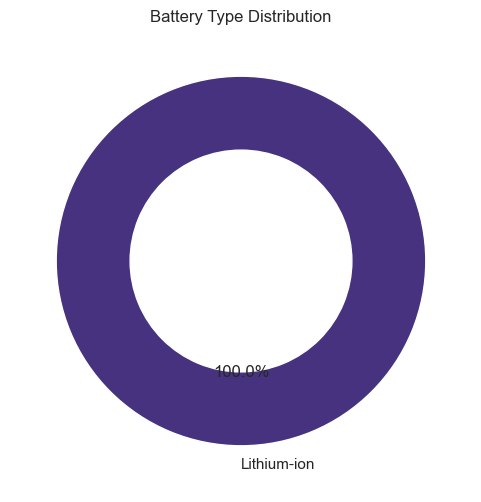

<Figure size 800x500 with 0 Axes>

In [45]:
# Battery Type Distribution 

if 'battery_type' in df.columns:
    plt.figure(figsize=(6,6))
    battery_counts = df['battery_type'].value_counts()
    plt.pie(
        battery_counts,
        labels=battery_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.4)
    )
    plt.title('Battery Type Distribution')
    plt.show()
    plt.savefig('../visuals/battery_type_distribution.png', dpi=300, bbox_inches='tight')


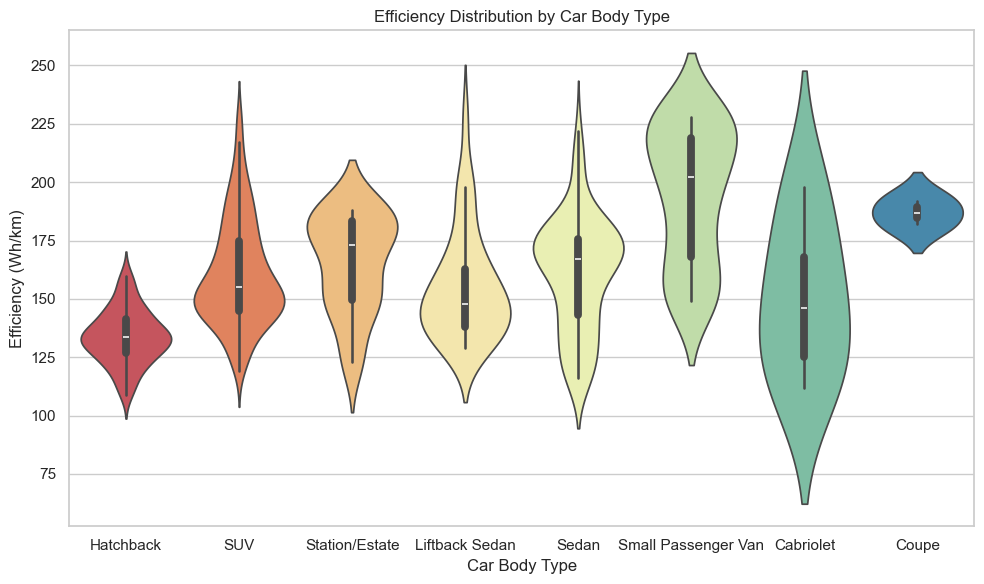

<Figure size 800x500 with 0 Axes>

In [46]:
# Car Body Type vs Energy Efficiency

plt.figure(figsize=(10,6))
sns.violinplot(
    data=df,
    x='car_body_type',
    y='efficiency_wh_per_km',
    hue='car_body_type',        
    palette='Spectral',
    legend=False,               
    dodge=False
)
plt.title('Efficiency Distribution by Car Body Type')
plt.xlabel('Car Body Type')
plt.ylabel('Efficiency (Wh/km)')
plt.tight_layout()
plt.show()
plt.savefig('../visuals/efficiency_distribution_by_car_body_type.png', dpi=300, bbox_inches='tight')
